## Hackathon № 3

**Hackathon Subject 1: Optimizing Bank Marketing Strategies for Customer Acquisition**

Description:

Suppose you work as a data analyst in a banking company within the marketing department, and your task is to dig into a comprehensive banking marketing dataset. The objective of this hackathon is to analyze the dataset to develop actionable insights and strategies for optimizing customer acquisition. The dataset contains information about previous marketing campaigns, customer profiles, and outcomes of marketing efforts. Participants are encouraged to leverage their data analysis and machine learning skills to uncover patterns, trends, and potential areas for improvement in the bank’s marketing approach.

## Data preprocessing

In [53]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import model_selection
#from sklearn.model_selection import GridSearchCV,KFold,cross_validate,train_test_split
#from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import warnings; warnings.filterwarnings(action = 'ignore')

In [2]:
# Loading the dataset 
file_path = r'C:\Users\Acer\Desktop\хакатон №3\банк\bank-additional\bank-additional-full.csv'
df = pd.read_csv(file_path, sep=';')
pd.set_option('display.max_columns', None)
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# checking for duplicate strings
df.duplicated().sum()

12

In [4]:
# duplicate removal
df = df.drop_duplicates()
len(df)

41176

In [5]:
print(df['job'].value_counts())
print('-----')
print(df['marital'].value_counts())
print('-----')
print(df['education'].value_counts())
print('-----')
print(df['default'].value_counts())
print('-----')
print(df['housing'].value_counts())
print('-----')
print(df['loan'].value_counts())
print('-----')
print(df['contact'].value_counts())
print('-----')
print(df['month'].value_counts())
print('-----')
print(df['day_of_week'].value_counts())
print('-----')
print(df['poutcome'].value_counts())
print('-----')
print(df['y'].value_counts())

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
-----
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
-----
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
-----
no         32577
unknown     8596
yes            3
Name: default, dtype: int64
-----
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64
-----
no         33938
yes         6248
unknown      990
Name: loan, dtype: int64
-----
cellular     26135
telephone    15041
Name: contact, dtype: int64
--

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


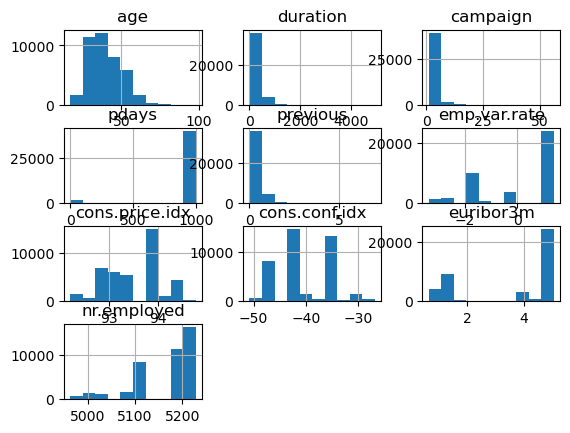

In [12]:
df.hist();

<div style="border:solid green 2px; padding: 20px">

    
**The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed.**
    
    This dataset is based on "Bank Marketing" UCI dataset.
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
 
   Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. 
    Dataset ordered by date (from May 2008 to November 2010).
    
- Input variables:
    
   **bank client data:**
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
    
   **related with the last contact of the current campaign:**
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    
   **other attributes:**
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
    
   **social and economic context attributes**
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)
  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

- Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label.

In [6]:
# Replacing the values "yes" and "no" with 1 and 0
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [7]:
# Rename the 'y' column to a more understandable name
df.rename(columns={'y': 'subscribed_deposit'}, inplace=True)

<div style="border:solid green 2px; padding: 20px">
    
**There are only three "yes" values in the "default" column. Most values are "no" and 8596 values are unknown. Therefore, this column is uninformative for further analysis and can be deleted.**

In [8]:
# Deleting the "default" column
df = df.drop(columns=['default'])

## Exploratory data analysis (EDA)

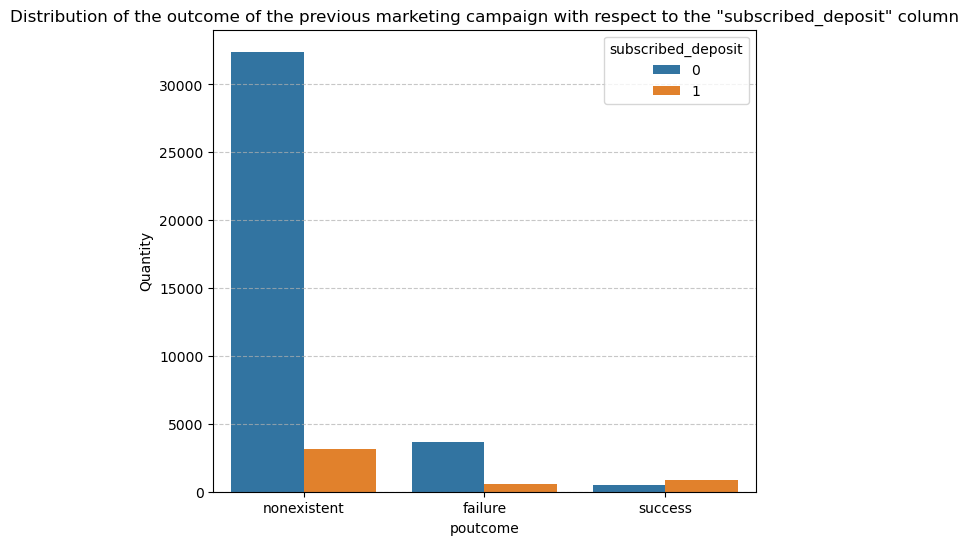

In [9]:
# plottng bar chart
plt.figure(figsize=(7, 6))
sns.countplot(x='poutcome', hue='subscribed_deposit', data=df)
plt.title('Distribution of the outcome of the previous marketing campaign with respect to the "subscribed_deposit" column')
plt.xlabel('poutcome')
plt.ylabel('Quantity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

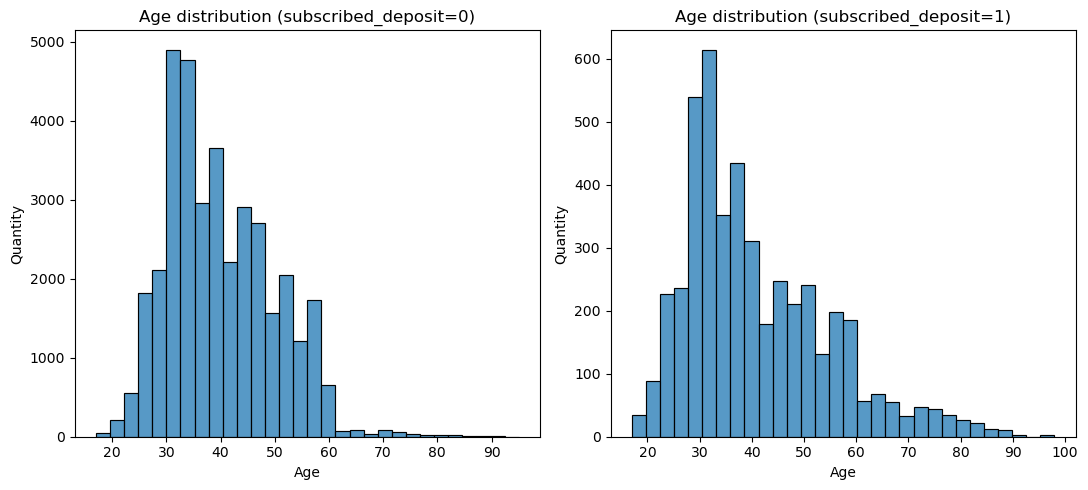

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

# Histogram for y=0
sns.histplot(df[df['subscribed_deposit'] == 0]['age'], bins=30, kde=False, ax=axes[0])
axes[0].set_title('Age distribution (subscribed_deposit=0)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Quantity')

# Histogram for y=1
sns.histplot(df[df['subscribed_deposit'] == 1]['age'], bins=30, kde=False, ax=axes[1])
axes[1].set_title('Age distribution (subscribed_deposit=1)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Quantity')

plt.tight_layout()
plt.show()

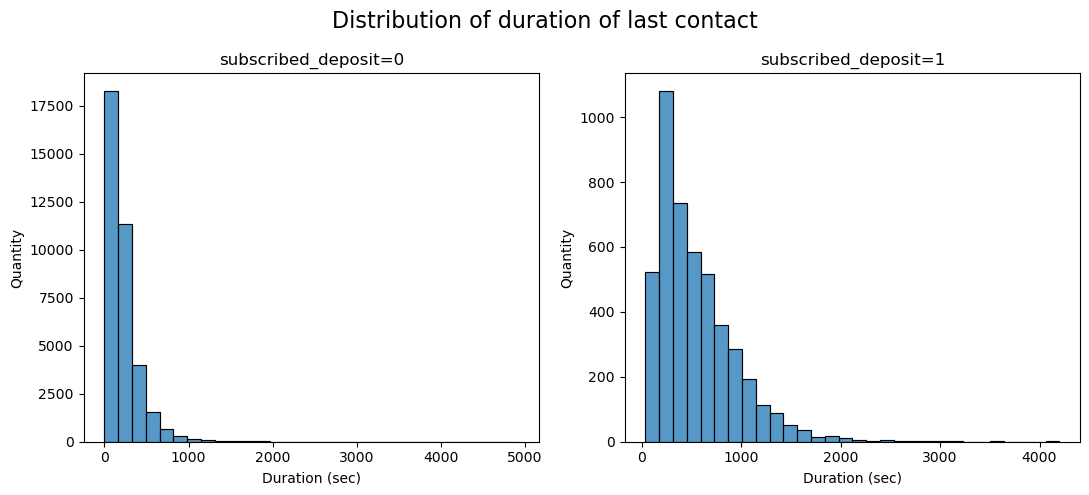

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

# Histogram for y=0
sns.histplot(df[df['subscribed_deposit'] == 0]['duration'], bins=30, kde=False, ax=axes[0])
axes[0].set_title('subscribed_deposit=0')
axes[0].set_xlabel('Duration (sec)')
axes[0].set_ylabel('Quantity')

# Histogram for y=1
sns.histplot(df[df['subscribed_deposit'] == 1]['duration'], bins=30, kde=False, ax=axes[1])
axes[1].set_title('subscribed_deposit=1')
axes[1].set_xlabel('Duration (sec)')
axes[1].set_ylabel('Quantity')

fig.suptitle('Distribution of duration of last contact', fontsize=16)
plt.tight_layout()
plt.show()

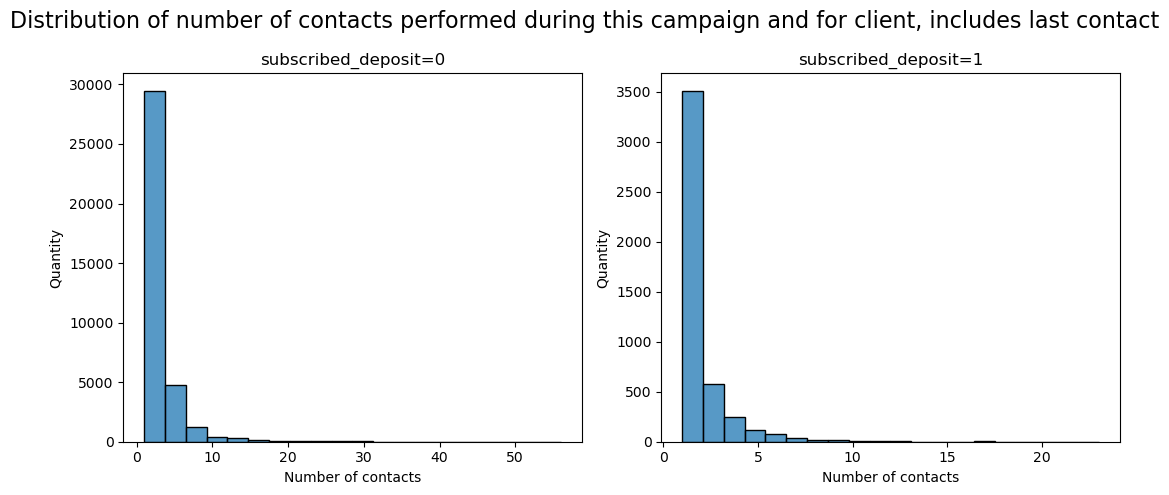

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

# Histogram for y=0
sns.histplot(df[df['subscribed_deposit'] == 0]['campaign'], bins=20, kde=False, ax=axes[0])
axes[0].set_title('subscribed_deposit=0')
axes[0].set_xlabel('Number of contacts')
axes[0].set_ylabel('Quantity')

# Histogram for y=1
sns.histplot(df[df['subscribed_deposit'] == 1]['campaign'], bins=20, kde=False, ax=axes[1])
axes[1].set_title('subscribed_deposit=1')
axes[1].set_xlabel('Number of contacts')
axes[1].set_ylabel('Quantity')

fig.suptitle('Distribution of number of contacts performed during this campaign and for client, includes last contact', fontsize=16)

plt.tight_layout()
plt.show()

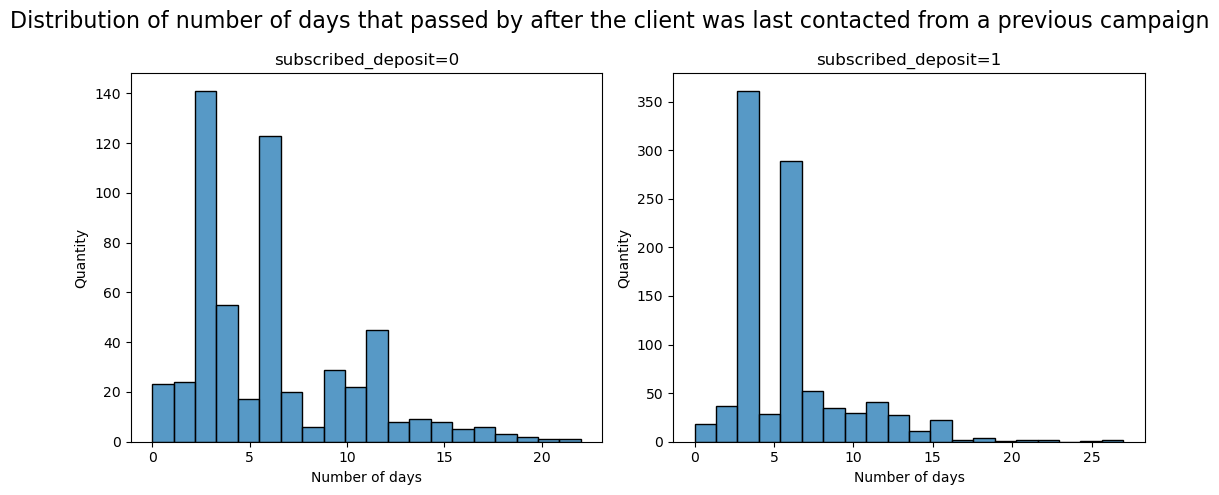

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

# Histogram for y=0
sns.histplot(df[(df['subscribed_deposit'] == 0) & (df['pdays'] != 999)]['pdays'], bins=20, kde=False, ax=axes[0])
axes[0].set_title('subscribed_deposit=0')
axes[0].set_xlabel('Number of days')
axes[0].set_ylabel('Quantity')

# Histogram for y=1
sns.histplot(df[(df['subscribed_deposit'] == 1) & (df['pdays'] != 999)]['pdays'], bins=20, kde=False, ax=axes[1])
axes[1].set_title('subscribed_deposit=1')
axes[1].set_xlabel('Number of days')
axes[1].set_ylabel('Quantity')

# 999 means client was not previously contacted, so it is necessary to exclude this value for plotting the graph
fig.suptitle('Distribution of number of days that passed by after the client was last contacted from a previous campaign', fontsize=16)
plt.tight_layout()
plt.show()

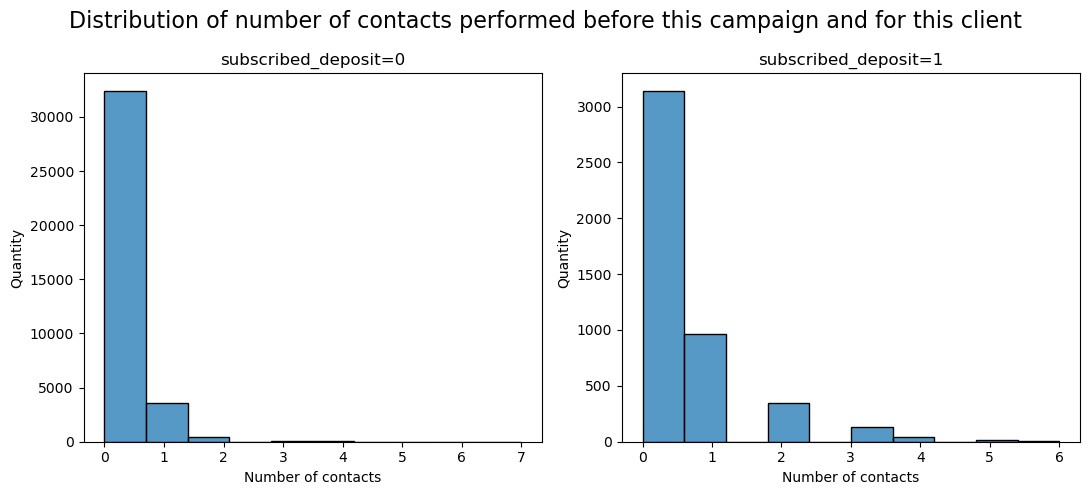

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

# Histogram for y=0
sns.histplot(df[df['subscribed_deposit'] == 0]['previous'], bins=10, kde=False, ax=axes[0])
axes[0].set_title('subscribed_deposit=0')
axes[0].set_xlabel('Number of contacts')
axes[0].set_ylabel('Quantity')

# Histogram for y=1
sns.histplot(df[df['subscribed_deposit'] == 1]['previous'], bins=10, kde=False, ax=axes[1])
axes[1].set_title('subscribed_deposit=1')
axes[1].set_xlabel('Number of contacts')
axes[1].set_ylabel('Quantity')

fig.suptitle('Distribution of number of contacts performed before this campaign and for this client', fontsize=16)

plt.tight_layout()
plt.show()

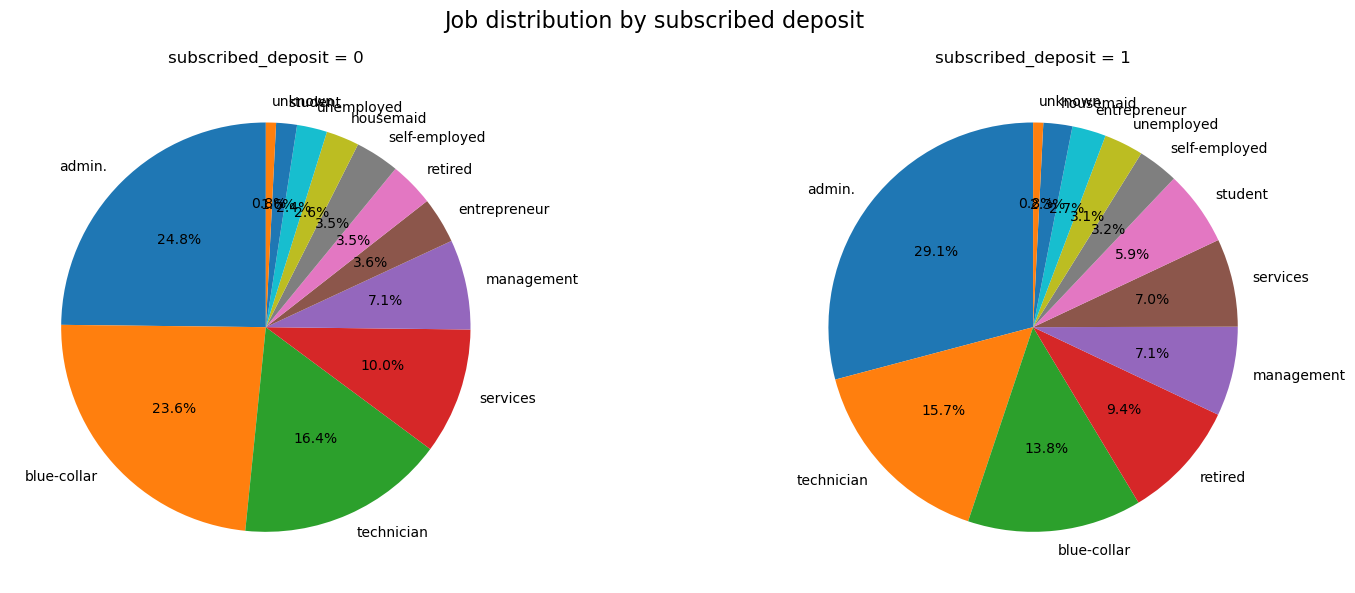

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Subgraphic for 'subscribed_deposit' = 0
job_counts_0 = df[df['subscribed_deposit'] == 0]['job'].value_counts()
axes[0].pie(job_counts_0, labels=job_counts_0.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('subscribed_deposit = 0')

# Subgraphic for'subscribed_deposit' = 1
job_counts_1 = df[df['subscribed_deposit'] == 1]['job'].value_counts()
axes[1].pie(job_counts_1, labels=job_counts_1.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('subscribed_deposit = 1')

fig.suptitle('Job distribution by subscribed deposit', fontsize=16)

plt.tight_layout()
plt.show()

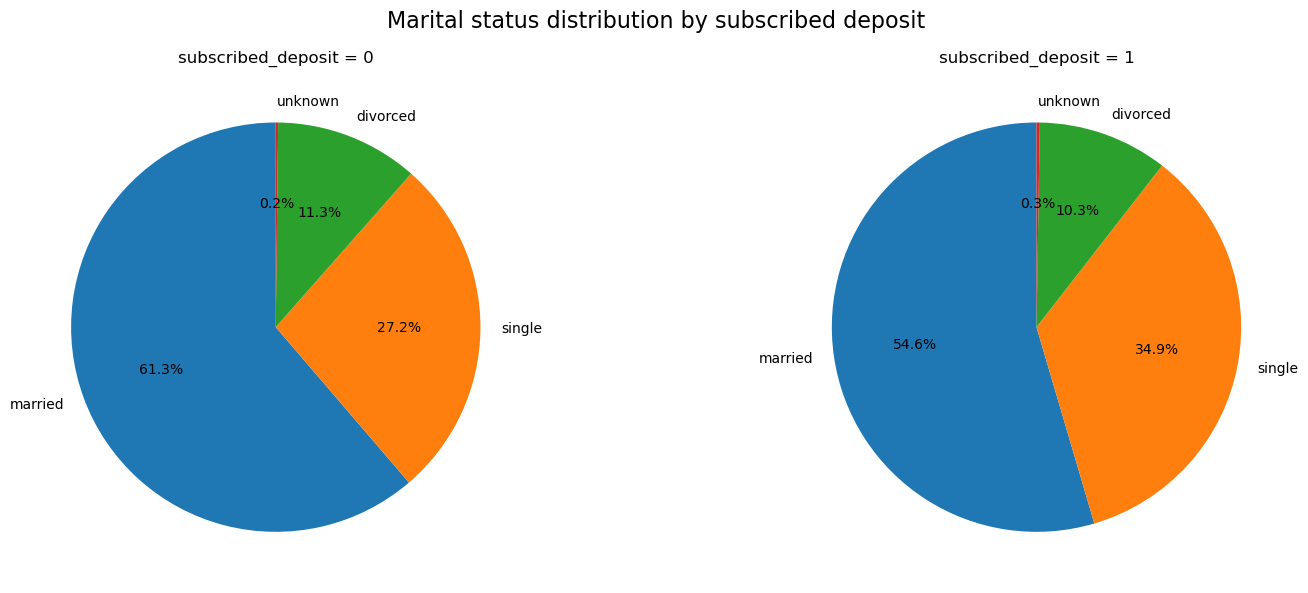

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Subgraphic for 'subscribed_deposit' = 0
marital_counts_0 = df[df['subscribed_deposit'] == 0]['marital'].value_counts()
axes[0].pie(marital_counts_0, labels=marital_counts_0.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('subscribed_deposit = 0')

# Subgraphic for'subscribed_deposit' = 1
marital_counts_1 = df[df['subscribed_deposit'] == 1]['marital'].value_counts()
axes[1].pie(marital_counts_1, labels=marital_counts_1.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('subscribed_deposit = 1')

fig.suptitle('Marital status distribution by subscribed deposit', fontsize=16)

plt.tight_layout()
plt.show()

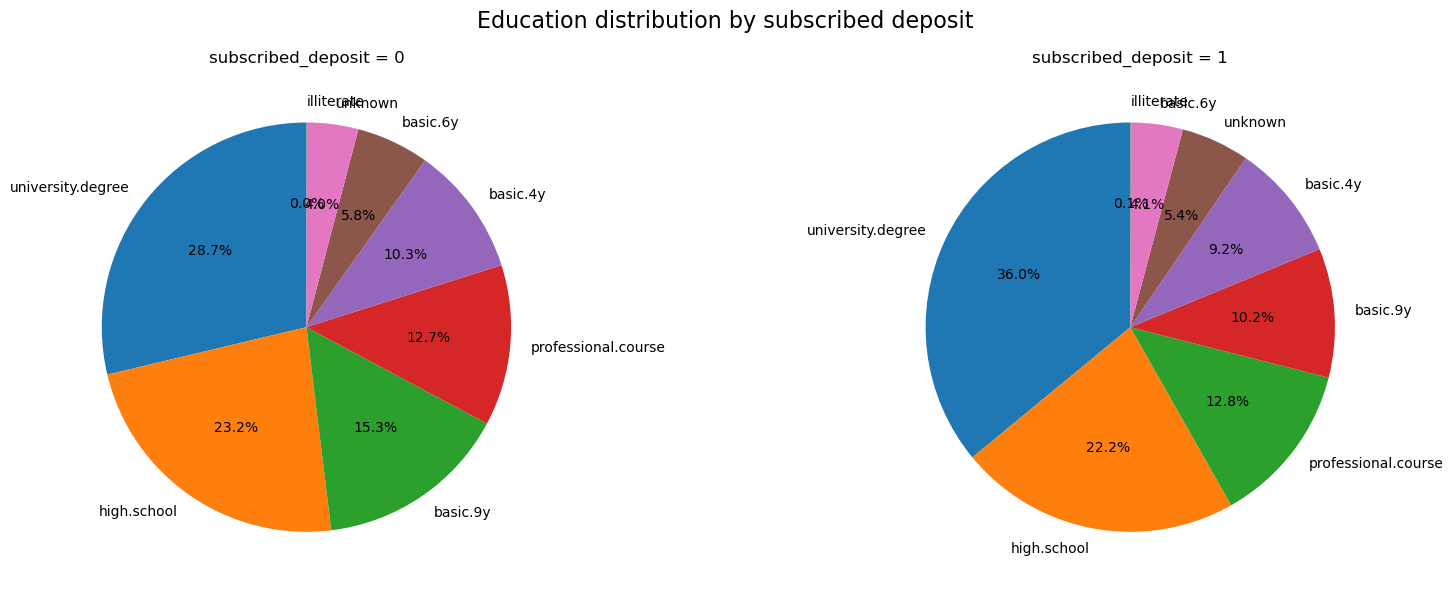

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Subgraphic for 'subscribed_deposit' = 0
education_counts_0 = df[df['subscribed_deposit'] == 0]['education'].value_counts()
axes[0].pie(education_counts_0, labels=education_counts_0.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('subscribed_deposit = 0')

# Subgraphic for'subscribed_deposit' = 1
education_counts_1 = df[df['subscribed_deposit'] == 1]['education'].value_counts()
axes[1].pie(education_counts_1, labels=education_counts_1.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('subscribed_deposit = 1')

fig.suptitle('Education distribution by subscribed deposit', fontsize=16)

plt.tight_layout()
plt.show()

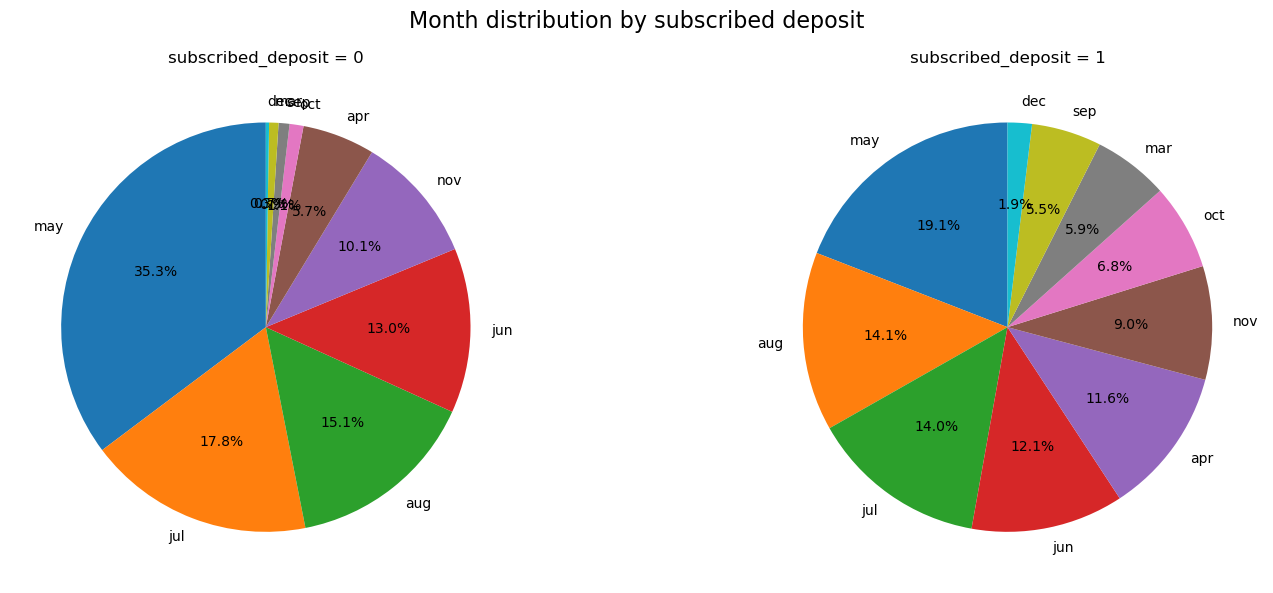

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Subgraphic for 'subscribed_deposit' = 0
month_counts_0 = df[df['subscribed_deposit'] == 0]['month'].value_counts()
axes[0].pie(month_counts_0, labels=month_counts_0.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('subscribed_deposit = 0')

# Subgraphic for'subscribed_deposit' = 1
month_counts_1 = df[df['subscribed_deposit'] == 1]['month'].value_counts()
axes[1].pie(month_counts_1, labels=month_counts_1.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('subscribed_deposit = 1')

fig.suptitle('Month distribution by subscribed deposit', fontsize=16)

plt.tight_layout()
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
**Key conclusions from the EDA stage:**
    
- In most cases, customers were not called by other marketing campaigns (35551). In 4252 cases the result of the previous marketing campaign was failure, in 1373 cases it was successful. The success rate is lowest among those who were not called as part of previous marketing campaigns. And among customers who participated in previous marketing campaigns and the result was successful, success was twice as common as failure in this campaign.
- Most clients are between the ages of 25 and 52. The highest peak on the charts is in the age range of 30-34 years. Among young people under 25 years old and older people over 60 years old there was more often success in the marketing campaign (subscribe a term deposit). 
- The duration of the last contact is generally between 0 and 350 seconds. At the same time, in the case of a successful marketing campaign, the duration of contact is longer - most conversations are up to 1000 seconds.
- The number of contacts made during a given campaign for a given customer is mostly in the range of 1-4 times. In case of success in the marketing campaign the number of contacts could be higher - up to 7 times.
- In most cases, the customer was not contacted in previous marketing campaigns. In cases where the client was contacted in previous campaigns, it was mostly 1 to 12 days since that moment. Most often it is 3 or 6 days. Among the successful and unsuccessful results of this campaign, the distribution of the number of days since the previous contact is about the same.
- The number of contacts made prior to this campaign for this customer is mostly in the range of 0-2 times. At the same time, in case of a successful campaign the number of previous contacts is higher - there is a more significant share of 1-3 contacts.
- The jobs with the most clients who participated in the marketing campaign are: admin. - 10419, 
blue-collar - 9253, technician - 6739, services - 3967. At the same time, among the successful results of the campaign, a higher share of technicians, pensioners, students. 
- The marital status of marketing campaign participants is distributed as follows: married - 24921, single - 11564, divorced - 4611. At the same time, among successful cases of the campaign the share of single people is higher.
- The most common level of education is university.degree - 12164, high.school - 9512, basic.9y - 6045, professional.course - 5240, basic.4y - 4176. At the same time, among the successful cases of the campaign the share of university.degree, professional.course, illiterate is higher (but there are only 18 such people).
- The last contact month of the year was most often May, July, August, June. However, among successful campaign cases, there was a smaller share of May, but a larger share of March, December and September.

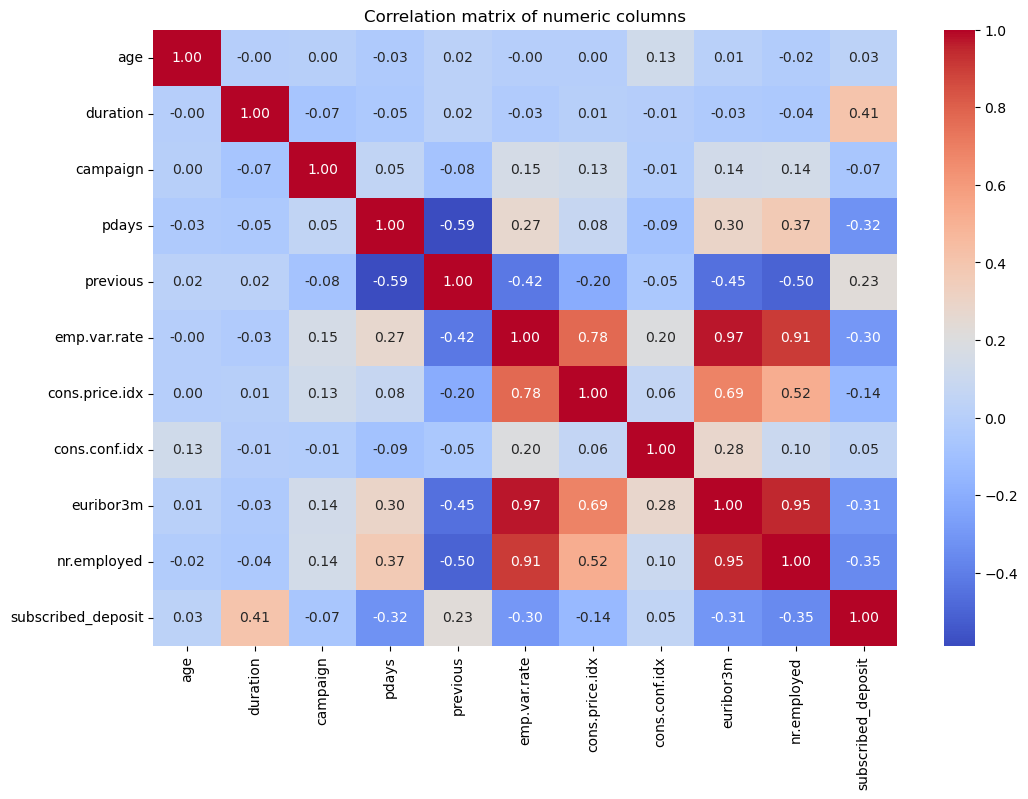

In [43]:
numeric_columns = df.select_dtypes(include='number')

# Construct the correlation matrix
correlation_matrix = numeric_columns.corr()

# Creating a heat map using seaborn 
plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix of numeric columns')
plt.show()

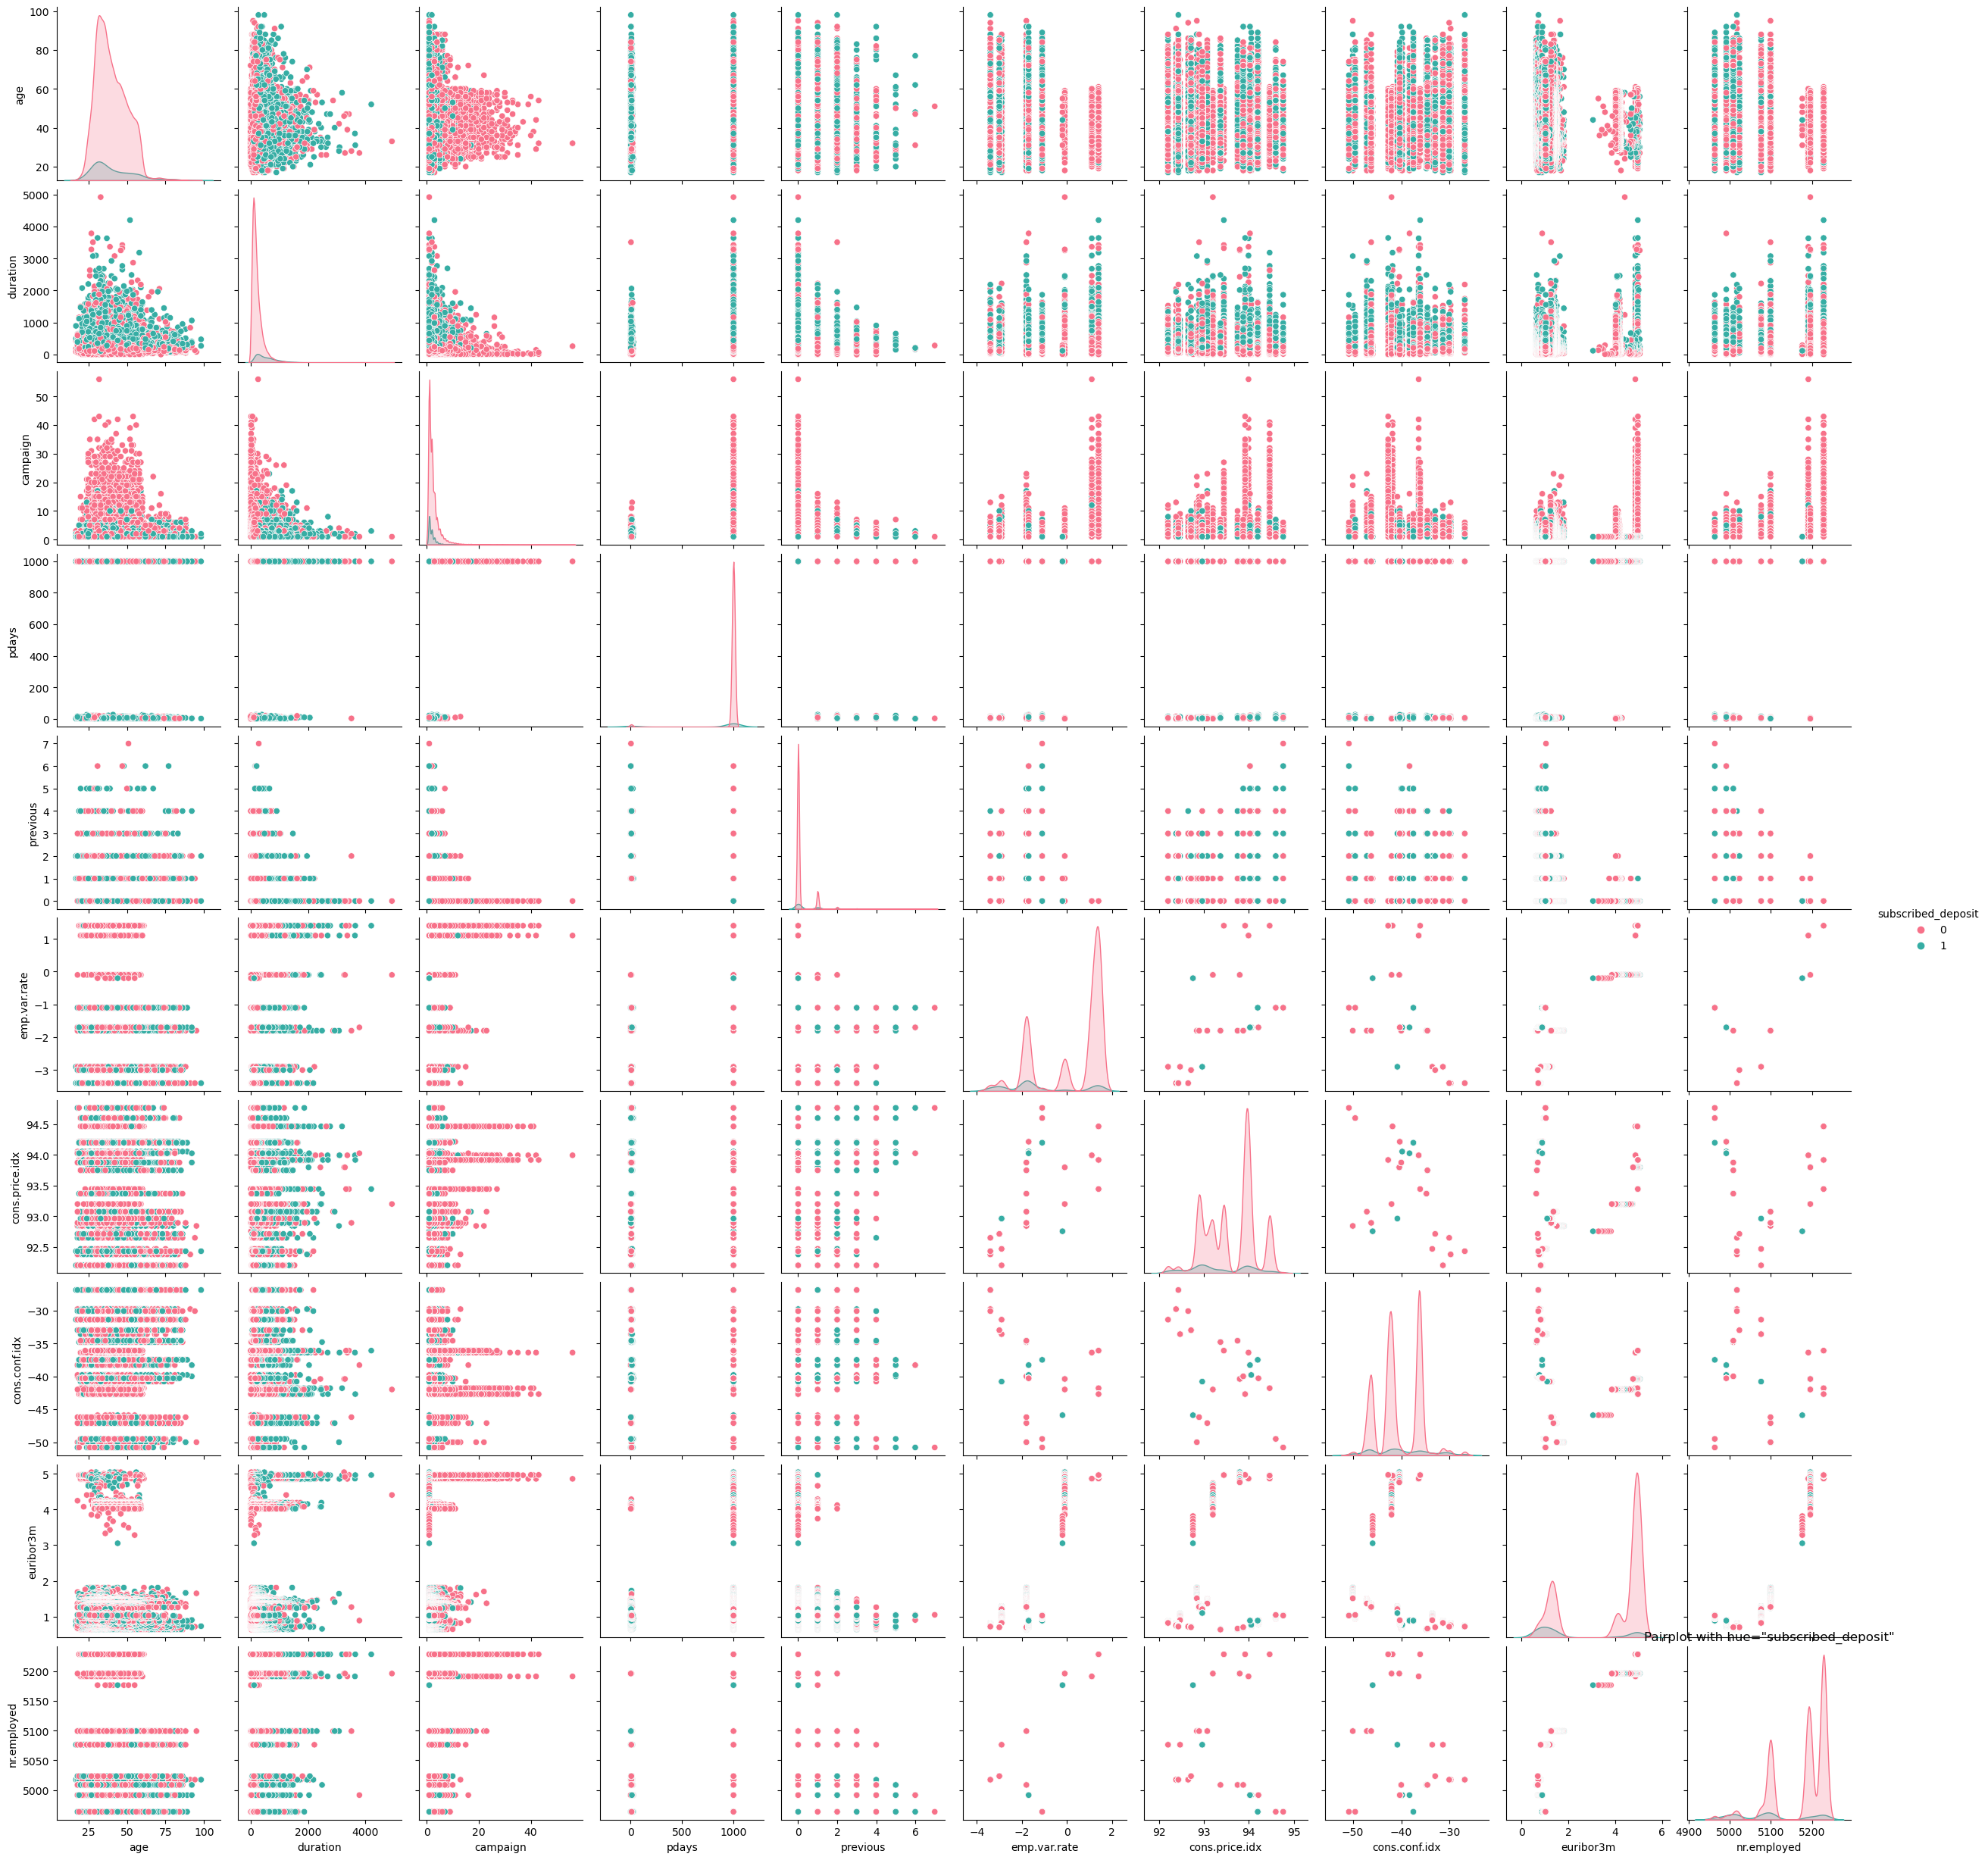

In [32]:
# Showing overall relationship between the variables
sns.pairplot(df, hue="subscribed_deposit", palette='husl')
plt.title('Pairplot with hue="subscribed_deposit"')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
- The strongest correlation between social and economic context attributes columns: between emp.var.rate and euribor3m - 0.97, euribor3m and nr.employed - 0.95.  The correlation matrix revealed an average correlation between the target column subscribed_deposit and last contact duration - 0.41, a negative correlation with the nr.employed column - -0.35, with the euribor3m column - -0.31. The main columns have rather strong correlation between number of contacts performed before this campaign and number of days that passed by after the client was last contacted from a previous campaign - negative correlation -0.59, between number of contacts performed before this campaign and number of employees - quarterly indicator - negative correlation -0.50, number of contacts performed before this campaign and euribor 3 month rate - negative correlation -0.45.

## Identify specific customer segments with positive reactions to past marketing campaigns

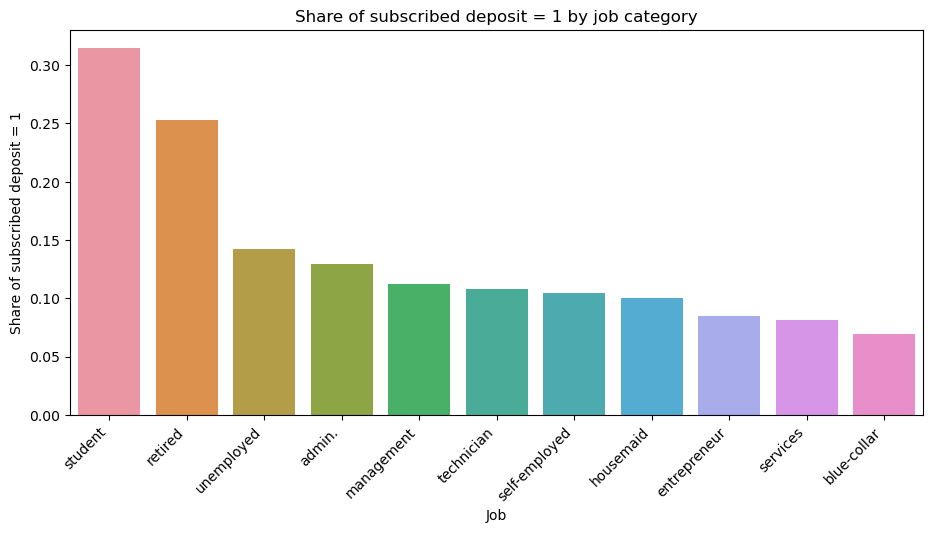

In [9]:
# Calculating the fraction 'subscribed_deposit' = 1 for each 'job' category
job_subscribed_deposit_1_ratio = df[df['job'] != 'unknown'].groupby('job')['subscribed_deposit'].mean().sort_values(ascending=False)

# Plotting a graph
plt.figure(figsize=(11, 5))
sns.barplot(x=job_subscribed_deposit_1_ratio.index, y=job_subscribed_deposit_1_ratio.values)
plt.title('Share of subscribed deposit = 1 by job category')
plt.xlabel('Job')
plt.ylabel('Share of subscribed deposit = 1')
plt.xticks(rotation=45, ha='right')
plt.show()

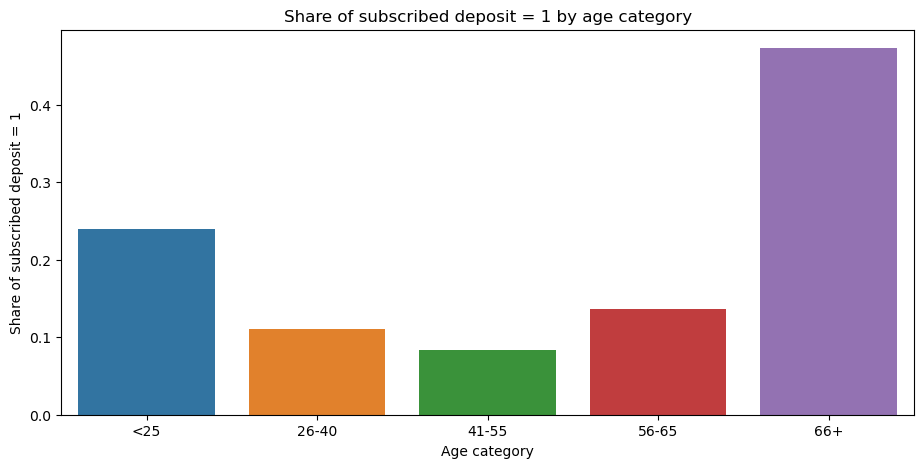

In [10]:
# Creating a new column 'age_category' with age categories
bins = [0, 25, 40, 55, 65, float('inf')]
labels = ['<25', '26-40', '41-55', '56-65', '66+']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculating the fraction 'subscribed_deposit' = 1 for each category 'age_category'
age_subscribed_deposit_1_ratio = df.groupby('age_category')['subscribed_deposit'].mean().sort_values(ascending=False)

#  Plotting a graph
plt.figure(figsize=(11, 5))
sns.barplot(x=age_subscribed_deposit_1_ratio.index, y=age_subscribed_deposit_1_ratio.values)
plt.title('Share of subscribed deposit = 1 by age category')
plt.xlabel('Age category')
plt.ylabel('Share of subscribed deposit = 1')
plt.show()

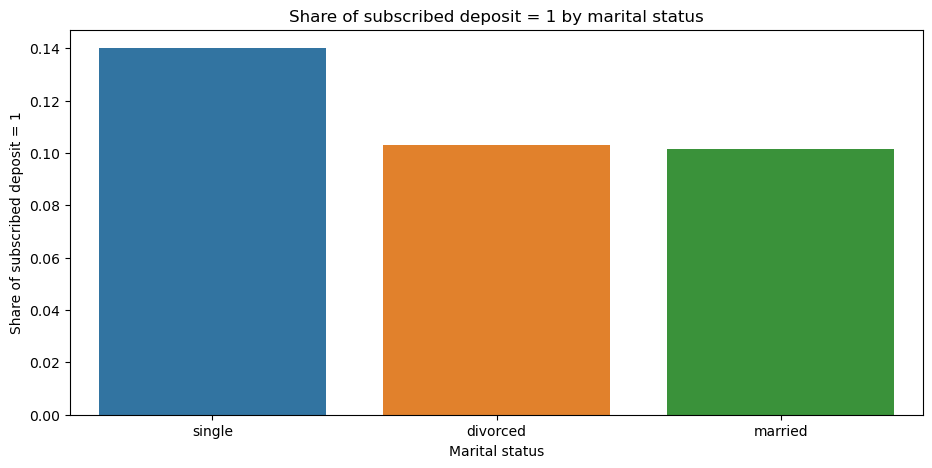

In [11]:
# Calculating the fraction 'subscribed_deposit' = 1 for each 'marital' category
marital_subscribed_deposit_1_ratio = df[df['marital'] != 'unknown'].groupby('marital')['subscribed_deposit'].mean().sort_values(ascending=False)

# Plotting a graph
plt.figure(figsize=(11, 5))
sns.barplot(x=marital_subscribed_deposit_1_ratio.index, y=marital_subscribed_deposit_1_ratio.values)
plt.title('Share of subscribed deposit = 1 by marital status')
plt.xlabel('Marital status')
plt.ylabel('Share of subscribed deposit = 1')
plt.show()

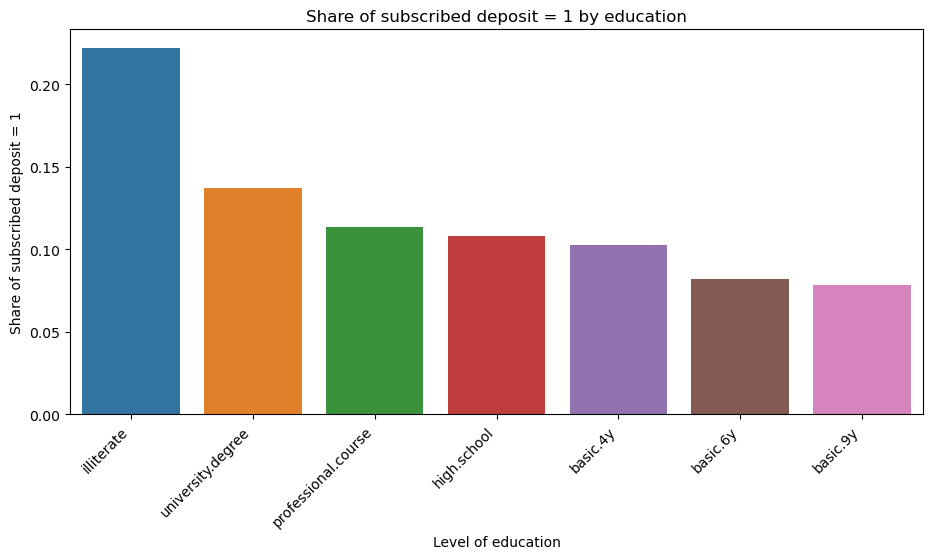

In [12]:
# Calculating the fraction 'subscribed_deposit' = 1 for each 'education' category
education_subscribed_deposit_1_ratio = df[df['education'] != 'unknown'].groupby('education')['subscribed_deposit'].mean().sort_values(ascending=False)

# Plotting a graph
plt.figure(figsize=(11, 5))
sns.barplot(x=education_subscribed_deposit_1_ratio.index, y=education_subscribed_deposit_1_ratio.values)
plt.title('Share of subscribed deposit = 1 by education')
plt.xlabel('Level of education')
plt.ylabel('Share of subscribed deposit = 1')
plt.xticks(rotation=45, ha='right')
plt.show()

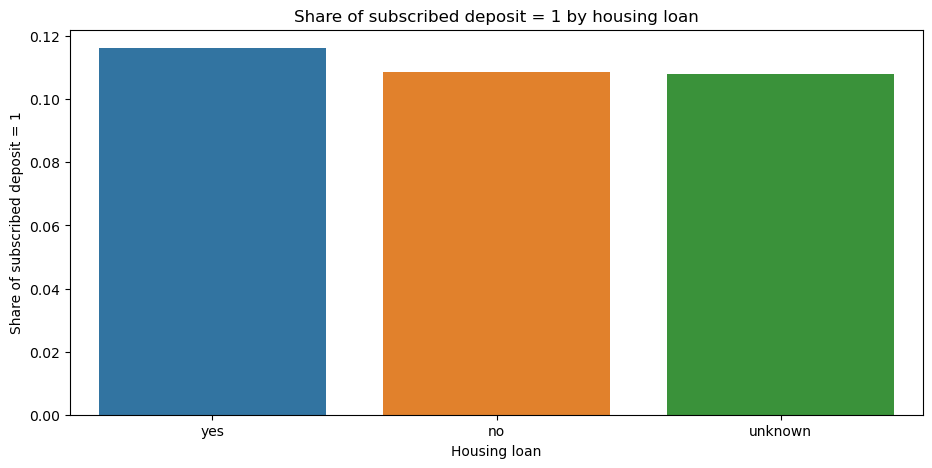

In [33]:
# Calculating the fraction 'subscribed_deposit' = 1 for each 'housing' category
housing_subscribed_deposit_1_ratio = df.groupby('housing')['subscribed_deposit'].mean().sort_values(ascending=False)

# Plotting a graph
plt.figure(figsize=(11, 5))
sns.barplot(x=housing_subscribed_deposit_1_ratio.index, y=housing_subscribed_deposit_1_ratio.values)
plt.title('Share of subscribed deposit = 1 by housing loan')
plt.xlabel('Housing loan')
plt.ylabel('Share of subscribed deposit = 1')
plt.show()

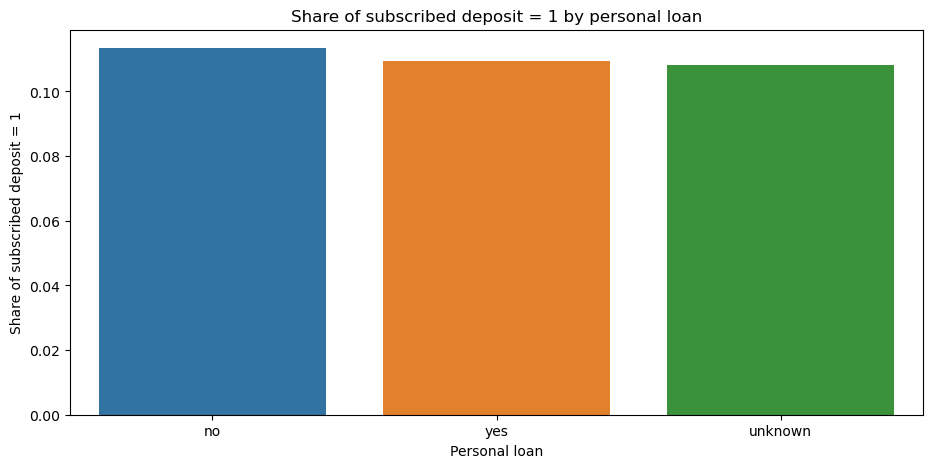

In [35]:
# Calculating the fraction 'subscribed_deposit' = 1 for each 'loan' category
loan_subscribed_deposit_1_ratio = df.groupby('loan')['subscribed_deposit'].mean().sort_values(ascending=False)

# Plotting a graph
plt.figure(figsize=(11, 5))
sns.barplot(x=loan_subscribed_deposit_1_ratio.index, y=loan_subscribed_deposit_1_ratio.values)
plt.title('Share of subscribed deposit = 1 by personal loan')
plt.xlabel('Personal loan')
plt.ylabel('Share of subscribed deposit = 1')
plt.show()

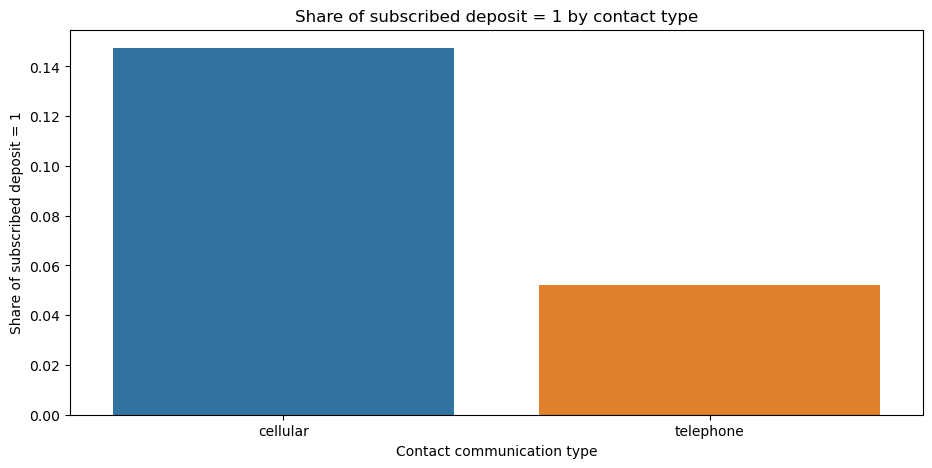

In [36]:
# Calculating the fraction 'subscribed_deposit' = 1 for each 'contact' type
contact_subscribed_deposit_1_ratio = df.groupby('contact')['subscribed_deposit'].mean().sort_values(ascending=False)

# Plotting a graph
plt.figure(figsize=(11, 5))
sns.barplot(x=contact_subscribed_deposit_1_ratio.index, y=contact_subscribed_deposit_1_ratio.values)
plt.title('Share of subscribed deposit = 1 by contact type')
plt.xlabel('Contact communication type')
plt.ylabel('Share of subscribed deposit = 1')
plt.show()

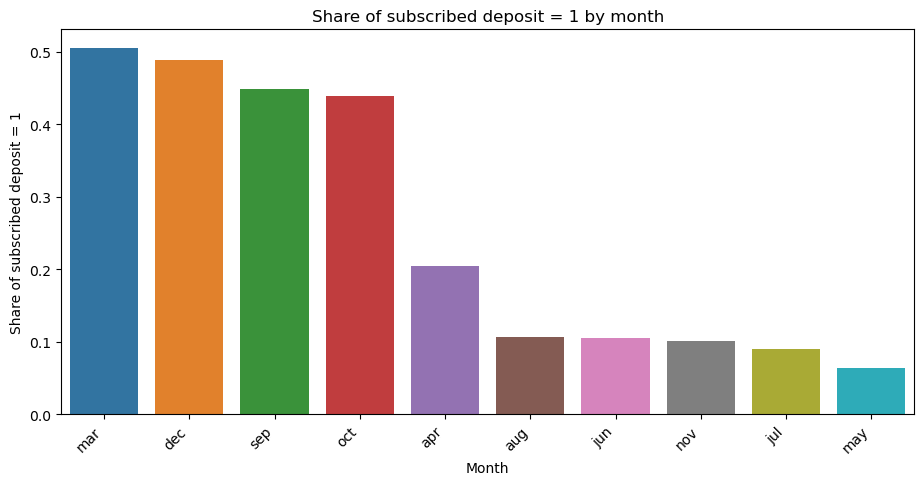

In [37]:
# Calculating the fraction 'subscribed_deposit' = 1 for each month
month_subscribed_deposit_1_ratio = df.groupby('month')['subscribed_deposit'].mean().sort_values(ascending=False)

# Plotting a graph
plt.figure(figsize=(11, 5))
sns.barplot(x=month_subscribed_deposit_1_ratio.index, y=month_subscribed_deposit_1_ratio.values)
plt.title('Share of subscribed deposit = 1 by month')
plt.xlabel('Month')
plt.ylabel('Share of subscribed deposit = 1')
plt.xticks(rotation=45, ha='right')
plt.show()

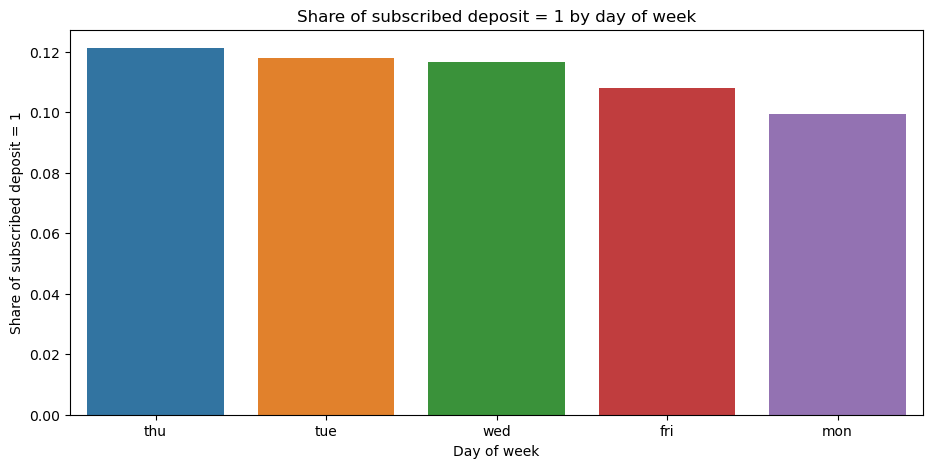

In [39]:
# Calculating the fraction 'subscribed_deposit' = 1 for each day of week
day_of_week_subscribed_deposit_1_ratio = df.groupby('day_of_week')['subscribed_deposit'].mean().sort_values(ascending=False)

# Plotting a graph
plt.figure(figsize=(11, 5))
sns.barplot(x=day_of_week_subscribed_deposit_1_ratio.index, y=day_of_week_subscribed_deposit_1_ratio.values)
plt.title('Share of subscribed deposit = 1 by day of week')
plt.xlabel('Day of week')
plt.ylabel('Share of subscribed deposit = 1')
plt.show()

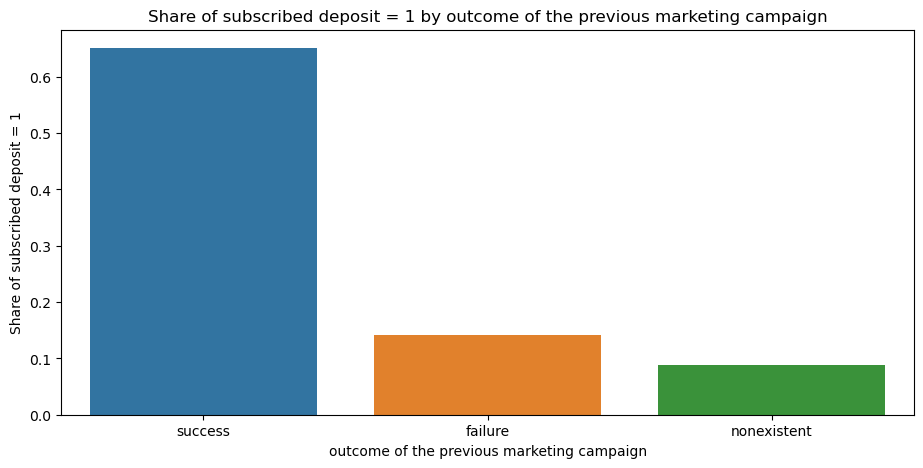

In [40]:
# Calculating the fraction 'subscribed_deposit' = 1 for each poutcome
poutcome_subscribed_deposit_1_ratio = df.groupby('poutcome')['subscribed_deposit'].mean().sort_values(ascending=False)

# Plotting a graph
plt.figure(figsize=(11, 5))
sns.barplot(x=poutcome_subscribed_deposit_1_ratio.index, y=poutcome_subscribed_deposit_1_ratio.values)
plt.title('Share of subscribed deposit = 1 by outcome of the previous marketing campaign')
plt.xlabel('Outcome of the previous marketing campaign')
plt.ylabel('Share of subscribed deposit = 1')
plt.show()

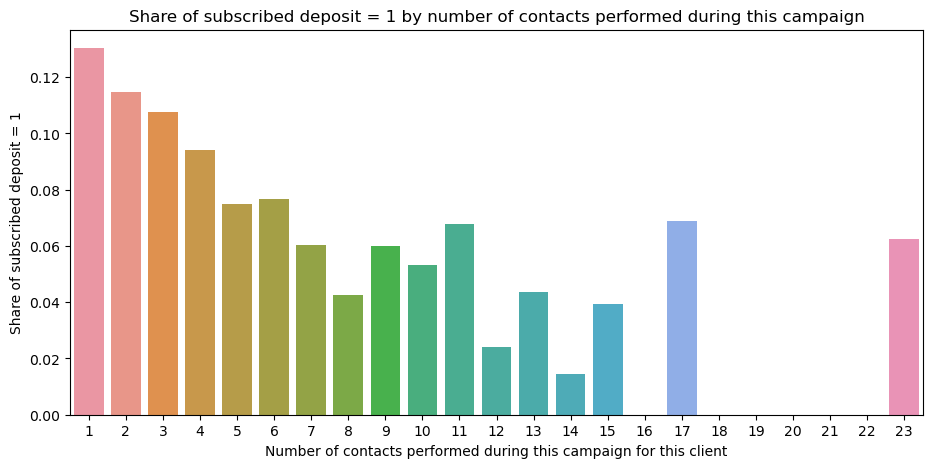

In [42]:
# Calculating the fraction 'subscribed_deposit' = 1 for each number of contacts performed during this campaign
campaign_subscribed_deposit_1_ratio = df[df['campaign'] <= 23].groupby('campaign')['subscribed_deposit'].mean().sort_values(ascending=False)

# Plotting a graph
plt.figure(figsize=(11, 5))
sns.barplot(x=campaign_subscribed_deposit_1_ratio.index, y=campaign_subscribed_deposit_1_ratio.values)
plt.title('Share of subscribed deposit = 1 by number of contacts performed during this campaign')
plt.xlabel('Number of contacts performed during this campaign for this client')
plt.ylabel('Share of subscribed deposit = 1')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
**Key conclusions:**
- Students have the highest success rate in a marketing campaign at 32%, retirees at 25%, and the unemployed at 14%. The least among blue-collar, services and entrepreneurs - less than 9%.
- Most often people over 66 years old agreed to open a deposit - about 55%, young people under 25 years old - about 24%. The marketing campaign was least successful among people 41-55 years old - only about 7%.
- The marketing campaign was most often successful among singles - about 14%. However, the difference between the results of different marital status is insignificant - in the other two groups the success rate is about 10%.
- The highest success rate is among illiterates, but there are only 18 of them in the dataset, so it is not worth emphasizing this group. Among the other education groups, the success rate ranges from 7.5% to 14%. University degree holders have the highest success rate.
- Customers with and without a home loan have about the same marketing campaign success rate, about 11-11.5%.
- Customers with and without personal loan also have about the same marketing campaign success rate, about 10.9-11.1%.
- A more preferred method of contacting a client is cellular than telephone. The success rate in such cases is three times higher - about 14.5%.
- Most often clients agreed to subscribe deposit in March (about 50%), December (about 48%), September (about 45%). The least frequent were May (about 6%), July (about 9%), November, June and August - about 11%. 
- There is almost no difference in the success rate by day of the week: the values are between 10% and 12%.
- In case a customer has participated in a previous marketing campaign and their response was positive, the success rate for this marketing campaign is around 65%. If the result was negative, the success rate is about 14%, if the client did not participate in the previous campaign - about 8%.
- In general, when you increase the number of contacts in this marketing campaign, the likelihood of success decreases. The highest success rate for a single contact is about 13%.

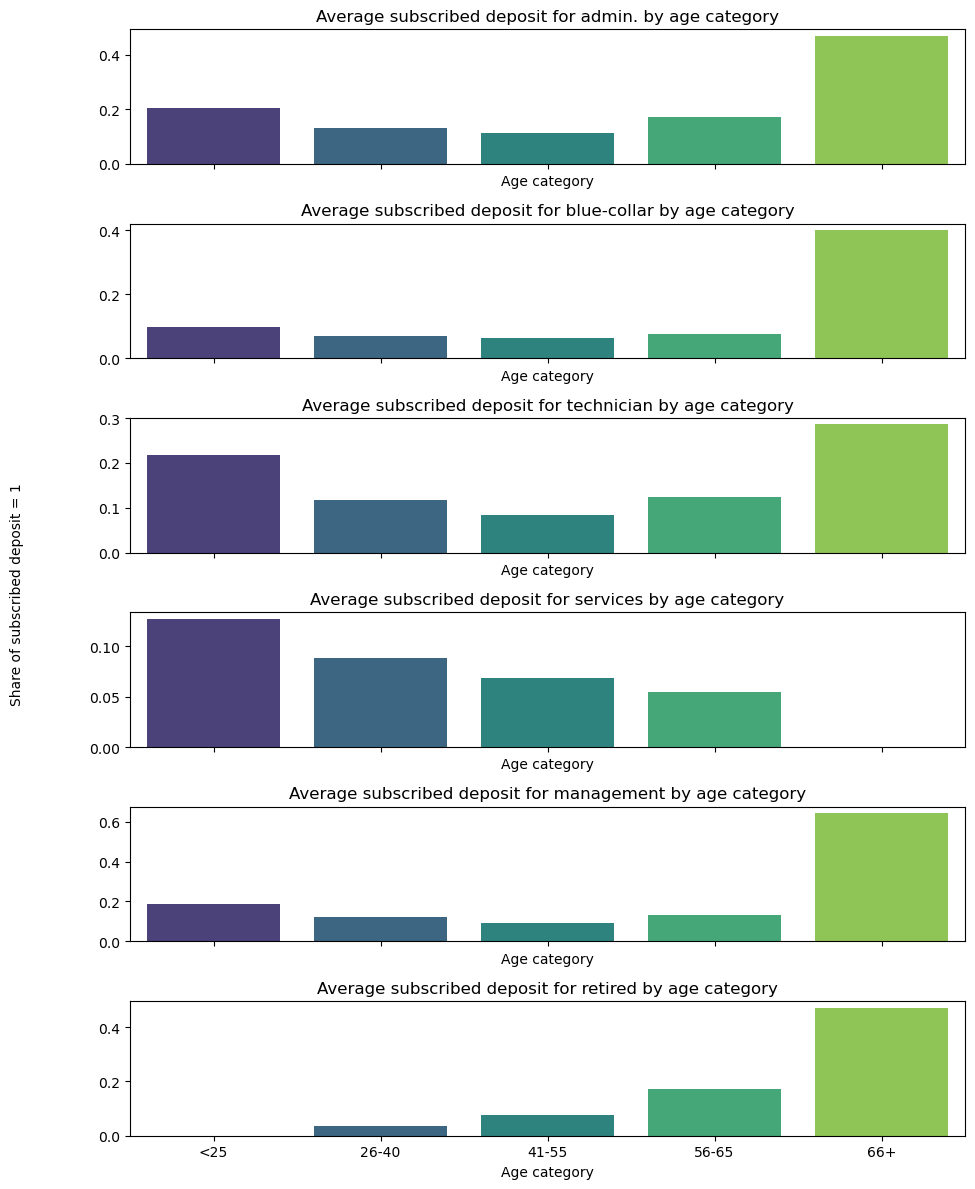

In [25]:
# Filtering by different types of 'job' and calculating average 'subscribed_deposit' values by 'age_category'
# Select the desired job categories
selected_jobs = ["admin.", "blue-collar", "technician", "services", "management", "retired"]

# Creating subplots
fig, axes = plt.subplots(nrows=len(selected_jobs), figsize=(10, 12), sharex=True)

# For each job category barplot construction
for i, job in enumerate(selected_jobs):
    job_data = df[df['job'] == job]
    average_subscribed_deposit = job_data.groupby('age_category')['subscribed_deposit'].mean()
    
    sns.barplot(x=average_subscribed_deposit.index, y=average_subscribed_deposit.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Average subscribed deposit for {job} by age category')
    axes[i].set_xlabel('Age category')

plt.tight_layout()
fig.text(0.03, 0.5, 'Share of subscribed deposit = 1', va='center', rotation='vertical')
fig.subplots_adjust(left=0.15)
plt.show()

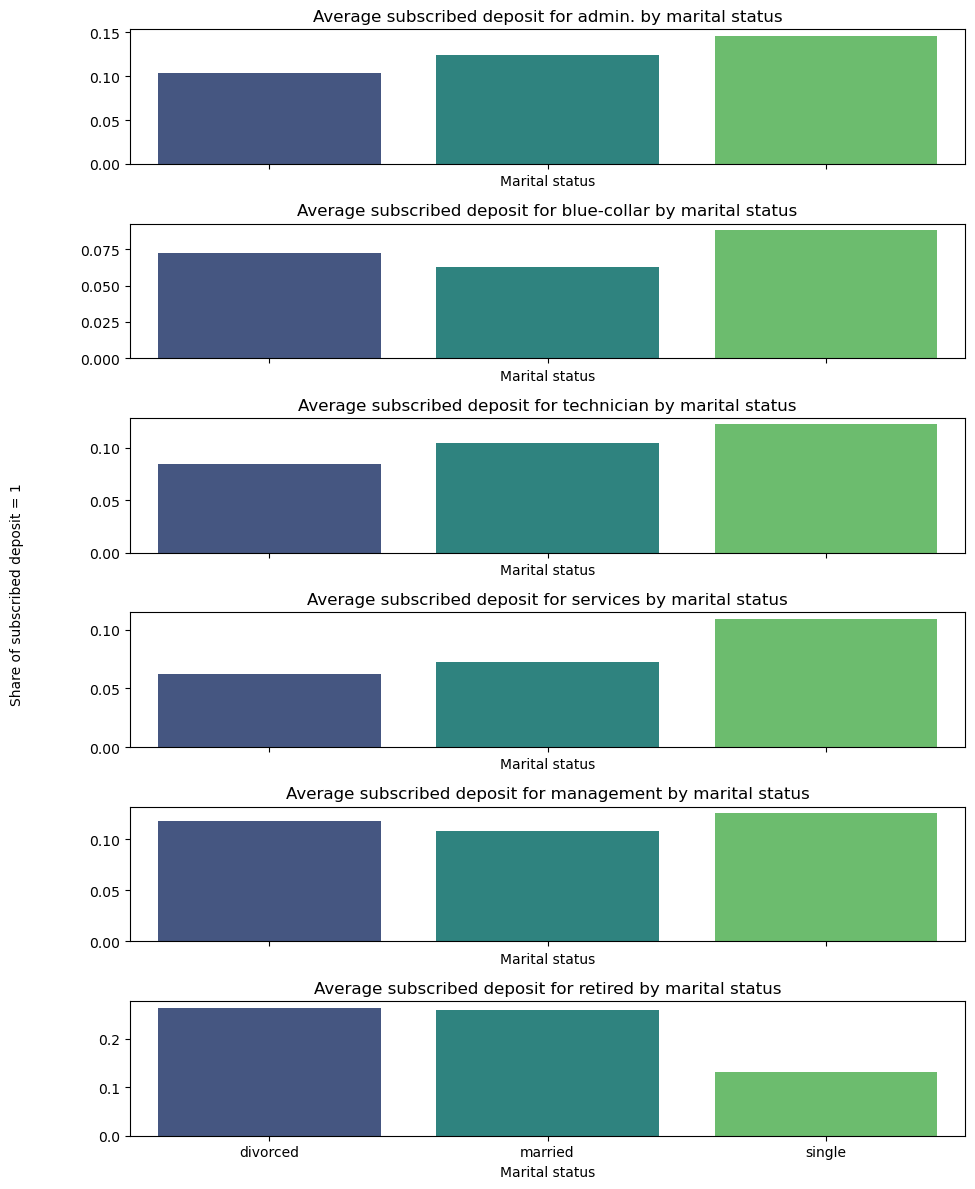

In [28]:
# Filtering by different types of 'job' and calculating average 'subscribed_deposit' values by marital status
# Select the desired job categories
selected_jobs = ["admin.", "blue-collar", "technician", "services", "management", "retired"]
 
# Creating subplots
fig, axes = plt.subplots(nrows=len(selected_jobs), figsize=(10, 12), sharex=True)

# For each job category barplot construction
for i, job in enumerate(selected_jobs):
    job_data = df[df['job'] == job]
    job_data = job_data[job_data['marital'] != 'unknown']
    average_subscribed_deposit = job_data.groupby('marital')['subscribed_deposit'].mean()
    
    sns.barplot(x=average_subscribed_deposit.index, y=average_subscribed_deposit.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Average subscribed deposit for {job} by marital status')
    axes[i].set_xlabel('Marital status')

plt.tight_layout()
fig.text(0.03, 0.5, 'Share of subscribed deposit = 1', va='center', rotation='vertical')
fig.subplots_adjust(left=0.15)
plt.show()

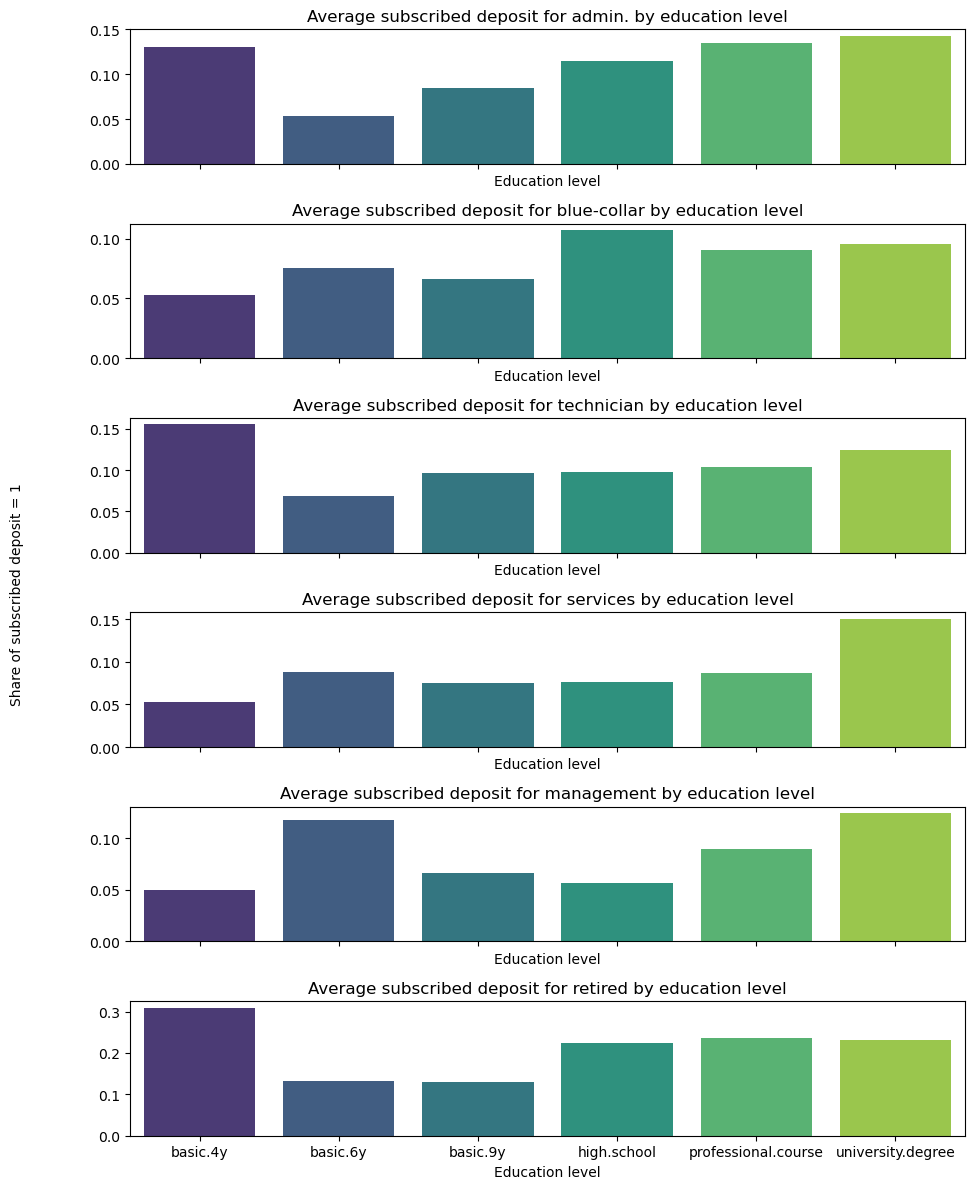

In [31]:
# Filtering by different types of 'job' and calculating average 'subscribed_deposit' values by education level
# Select the desired job categories
selected_jobs = ["admin.", "blue-collar", "technician", "services", "management", "retired"]
 
# Creating subplots
fig, axes = plt.subplots(nrows=len(selected_jobs), figsize=(10, 12), sharex=True)

# For each job category barplot construction
for i, job in enumerate(selected_jobs):
    job_data = df[df['job'] == job]
    job_data = job_data[(job_data['education'] != 'unknown') & (job_data['education'] != 'illiterate')]
    average_subscribed_deposit = job_data.groupby('education')['subscribed_deposit'].mean()
    
    sns.barplot(x=average_subscribed_deposit.index, y=average_subscribed_deposit.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Average subscribed deposit for {job} by education level')
    axes[i].set_xlabel('Education level')

plt.tight_layout()
fig.text(0.03, 0.5, 'Share of subscribed deposit = 1', va='center', rotation='vertical')
fig.subplots_adjust(left=0.15)
plt.show()

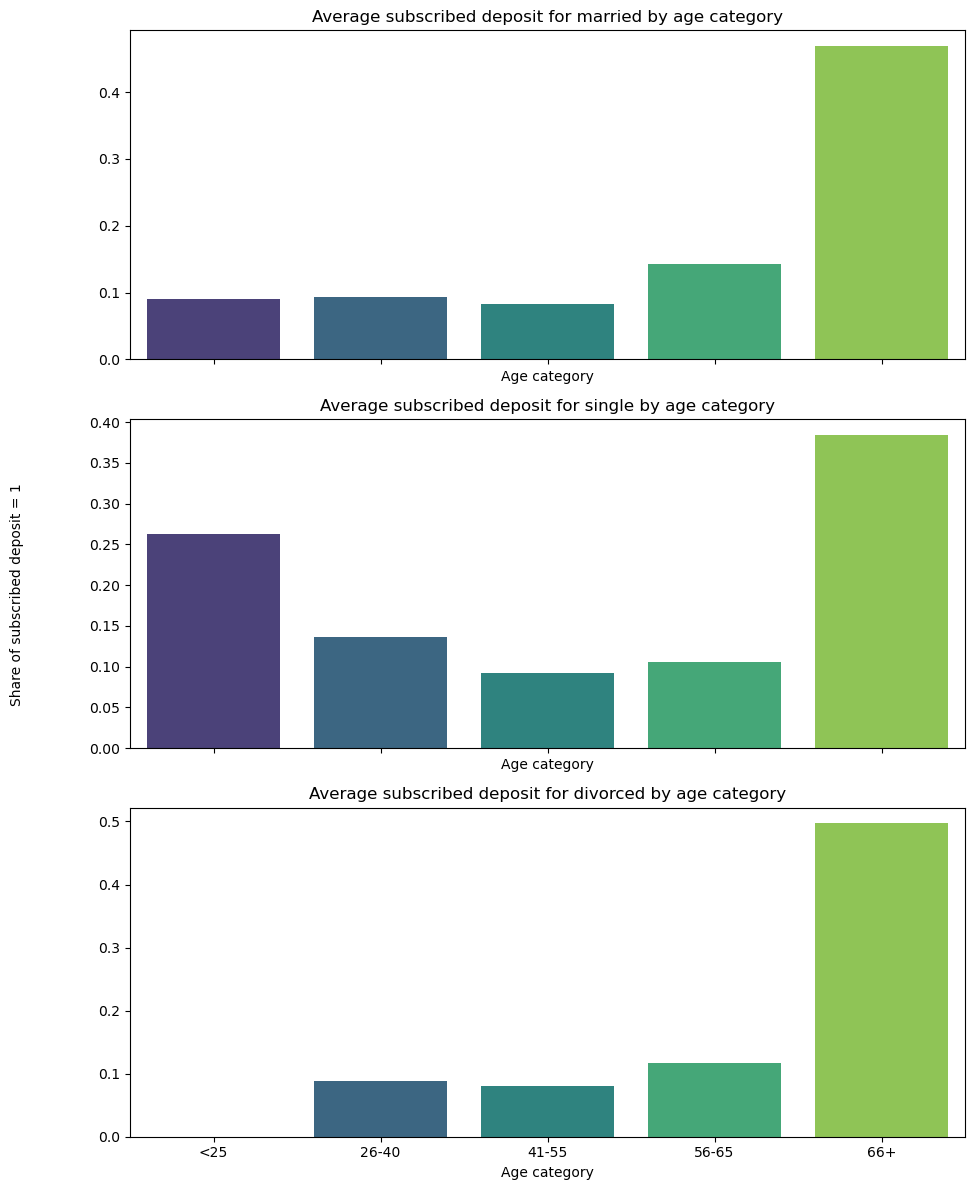

In [29]:
# Filtering by different types of 'marital' and calculating average 'subscribed_deposit' values by 'age_category'
# Select the desired marital status
marital_status = ["married", "single", "divorced"]
     
# Creating subplots
fig, axes = plt.subplots(nrows=len(marital_status), figsize=(10, 12), sharex=True)

# For each marital status barplot construction
for i, marital in enumerate(marital_status):
    marital_data = df[df['marital'] == marital]
    average_subscribed_deposit = marital_data.groupby('age_category')['subscribed_deposit'].mean()
    
    sns.barplot(x=average_subscribed_deposit.index, y=average_subscribed_deposit.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Average subscribed deposit for {marital} by age category')
    axes[i].set_xlabel('Age category')

plt.tight_layout()
fig.text(0.03, 0.5, 'Share of subscribed deposit = 1', va='center', rotation='vertical')
fig.subplots_adjust(left=0.15)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
**Based on the data analysis, we can identify several customer segments with higher success rates:**
- admin, management, technician, self-employed under 25 and over 56, single or married with university degree, professional courses or basic education.
- students, unemployed, retired divorced or married with basic education, university degree, high school or professional courses.

## Campaign Effectiveness Analysis:

Evaluate the effectiveness of previous marketing campaigns by analyzing conversion rates, response rates, and other relevant metrics.
Identify the most successful campaigns and understand the characteristics of customers who responded positively.

In [47]:
# Calculation of previous campaign conversions in successful cases of the current marketing campaign
conversion_rates = df[df['poutcome'] != 'nonexistent'].groupby('poutcome')['subscribed_deposit'].mean().round(2)
conversion_rates

poutcome
failure    0.14
success    0.65
Name: subscribed_deposit, dtype: float64

In [49]:
# Conversion calculation based on the results of the previous campaign
total_conversion = df[df['poutcome'] == 'success'].shape[0] / df[df['poutcome'] != 'nonexistent'].shape[0]

print(f'Conversion Rate of the previous marketing campaign was: {total_conversion:.2%}')

Conversion Rate of the previous marketing campaign was: 24.41%


In [50]:
# Calculation of the conversion rate of the current marketing campaign
conversion_current_campaign = df[df['subscribed_deposit'] == 1].shape[0] / df.shape[0]

print(f'Conversion Rate of the current marketing campaign is: {conversion_current_campaign:.2%}')

Conversion Rate of the current marketing campaign is: 11.27%


In [56]:
# Average call duration in the current campaign based on the results of the previous campaign
average_duration = df[df['poutcome'] != 'nonexistent'].groupby('poutcome')['duration'].mean().round(2)
average_duration

poutcome
failure    248.11
success    320.94
Name: duration, dtype: float64

In [58]:
# Average number of contacts based on the results of the previous campaign
average_contacts = df[df['poutcome'] != 'nonexistent'].groupby('poutcome')['previous'].mean().round(2)
average_contacts

poutcome
failure    1.17
success    1.57
Name: previous, dtype: float64

<div style="border:solid green 2px; padding: 20px">
    
The conversion rate of the previous marketing campaign among the participants of the current campaign is 24.41%. The conversion rate of the current campaign is two times less - 11.27%. At the same time, among those who had a positive result in the previous campaign the conversion rate is 65%, and among those who had a negative result - 14%. The duration of calls is also significantly longer with those clients who gave a positive answer in the previous campaign. The number of contacts made before the start of this campaign, in the case of success in the previous campaign is on average 1.57 times, in the case of failure - 1.17 times. 

## Predictive Modeling:

Build predictive models to forecast the likelihood of customer response to future marketing campaigns.
Explore machine learning algorithms to predict which customers are more likely to subscribe to a product or service.

In [45]:
df_copy = df.copy()
df_copy = df_copy.drop('age_category', axis=1)

In [46]:
# Select only numeric columns
numeric_columns = df_copy.select_dtypes(include=['number']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the selected numeric columns
df_copy[numeric_columns] = scaler.fit_transform(df_copy[numeric_columns])

In [47]:
# Select only categorical columns
categorical_columns = df_copy.select_dtypes(include=['object']).columns

# Apply OneHotEncoder using get_dummies
df_copy = pd.get_dummies(df_copy, columns=categorical_columns, drop_first=True)
df_copy.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed_deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [48]:
# Separate features (X) and target variable (y)
X = df_copy.drop('subscribed_deposit', axis=1)  # Features
y = df_copy['subscribed_deposit']  # Target variable

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy: 0.907
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     10929
         1.0       0.67      0.37      0.48      1424

    accuracy                           0.91     12353
   macro avg       0.80      0.68      0.71     12353
weighted avg       0.89      0.91      0.89     12353



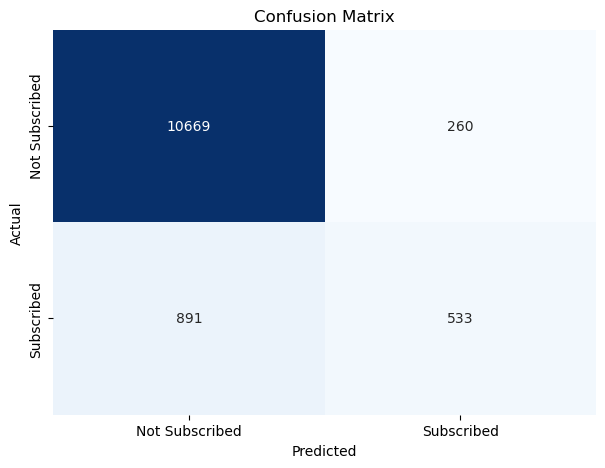

In [52]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print("Classification Report:")
print(report)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

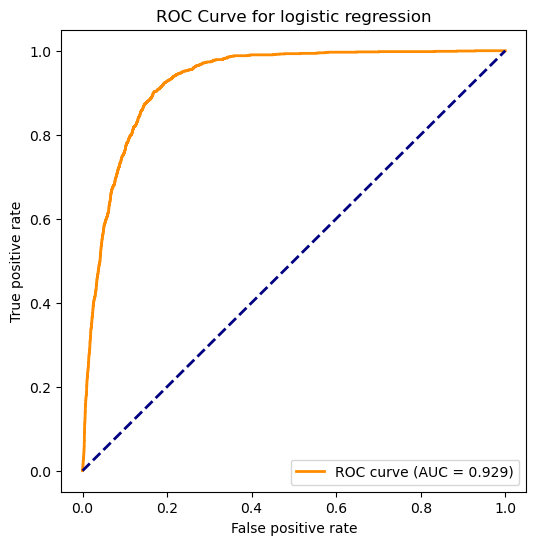

In [56]:
y_pred_proba = model.predict_proba(X_test)

# Extract the probability for the positive class
y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve for logistic regression')
plt.legend(loc='lower right')
plt.show()

Random Forest accuracy: 0.912
Random Forest classification report:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     10929
         1.0       0.67      0.47      0.55      1424

    accuracy                           0.91     12353
   macro avg       0.80      0.72      0.75     12353
weighted avg       0.90      0.91      0.91     12353



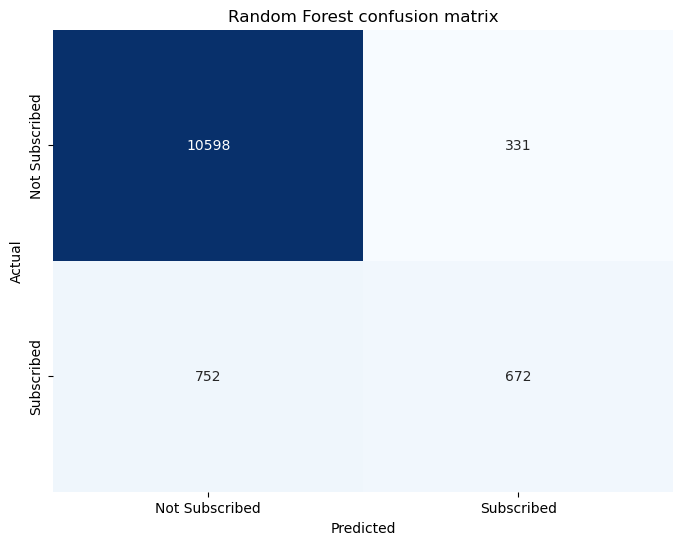

In [57]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)

# Print the results
print(f"Random Forest accuracy: {rf_accuracy:.3f}")
print("Random Forest classification report:")
print(rf_report)

# Plot the confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Random Forest confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
**Key conclusions**

    
**Logistic regression:**
- Accuracy: 0.907. Accuracy is a measure of overall correctness. In this case, it means the model correctly predicted the target variable for approximately 90.7% of the instances in the test set.

- Precision, Recall, F1-Score, and Support for Each Class:
Class 0 (Not Subscribed):
Precision: 92% - Of the instances predicted as Class 0, 92% were correct.
Recall: 98% - Of all actual instances of Class 0, 98% were correctly predicted.
F1-Score: 95% - A balanced measure of precision and recall.
Support: 10,929 - The actual number of instances of Class 0 in the test set.
Class 1 (Subscribed):
Precision: 67% - Of the instances predicted as Class 1, 67% were correct.
Recall: 37% - Of all actual instances of Class 1, 37% were correctly predicted.
F1-Score: 48% - A balanced measure of precision and recall.
Support: 1,424 - The actual number of instances of Class 1 in the test set.

- Macro and Weighted Averages:
Macro Average:
Precision: 80%
Recall: 68%
F1-Score: 71%
Weighted Average:
Precision: 89%
Recall: 91%
F1-Score: 89%
The macro and weighted averages provide an overall summary considering both classes.

- Confusion Matrix:
The confusion matrix shows the counts of true positive (533), true negative (10,669), false positive (260), and false negative (891) instances.
    
- In summary, the model performs well in predicting Class 0 (Not Subscribed) with high precision and recall. However, for Class 1 (Subscribed), the precision and recall are lower, indicating that the model struggles more with this class.
    
    

<div style="border:solid green 2px; padding: 20px">
    
**Random Forest:**
-  Accuracy: 0.912
Random Forest achieved an accuracy of approximately 91.2%, slightly higher than Logistic Regression.

- Precision, Recall, F1-Score, and Support for Each Class:
Class 0 (Not Subscribed):
Precision: 93% (slightly higher than Logistic Regression)
Recall: 97% (similar to Logistic Regression)
F1-Score: 95% (similar to Logistic Regression)
Support: 10,929

Class 1 (Subscribed):
Precision: 67% (same as Logistic Regression)
Recall: 47% (higher than Logistic Regression)
F1-Score: 55% (higher than Logistic Regression)
Support: 1,424

Macro and Weighted Averages:
Macro Average:
Precision: 80% (similar to Logistic Regression)
Recall: 72% (higher than Logistic Regression)
F1-Score: 75% (higher than Logistic Regression)
Weighted Average:
Precision: 90% (similar to Logistic Regression)
Recall: 91% (similar to Logistic Regression)
F1-Score: 91% (similar to Logistic Regression)

- Confusion Matrix:
Random Forest confusion matrix shows 10,598 true negatives, 331 false positives, 752 false negatives, and 672 true positives.
    
    
- Comparison with Logistic Regression:
Random Forest generally performs similarly or slightly better than Logistic Regression in terms of accuracy, precision, recall, and F1-score for both classes.
Random Forest achieves a higher recall for Class 1, indicating a better ability to identify positive instances compared to Logistic Regression.
The choice between Logistic Regression and Random Forest may depend on various factors, including interpretability, computational complexity, and the specific requirements of the problem.
In summary, Random Forest provides improvements in certain metrics, especially in correctly identifying positive instances, but the choice between the two models depends on the specific goals and constraints of the problem at hand.

## Feature Importance and Interpretability:

Identify the most influential features affecting customer decisions.
Provide insights into the key factors that contribute to successful marketing outcomes.

<div style="border:solid green 2px; padding: 20px">
 
- According to the study, pensioners, students and the unemployed, people under 25 or over 66 years of age responded positively to the marketing campaign more often. 
- In the summer months and in May, customers were much less likely to agree to subscribe a deposit, which may be due to the vacation season and the fact that customers are not in the mood to take care of pressing matters.
- Cellular calls are much more effective.
- As the number of calls increases, the likelihood of a positive customer response decreases. Therefore, in case of rejection, it is better to focus on other customers and develop another offer for the rejected ones.
- At the same time, the positive response to a marketing campaign is much higher for those who have been called within the framework of previous advertising campaigns. Therefore, it is possible to expand the reach of campaign participants.
- The availability of a personal loan or for housing does not affect the decision making of the campaign.

## Recommendation Engine:

Build a recommendation system for suggesting personalized marketing strategies based on customer profiles and historical data.
Enhance the bank’s ability to provide tailored offers to different customer segments.

<div style="border:solid green 2px; padding: 20px">

**Recommendation: Implement personalized marketing strategies for specific customer segments**

After analyzing the results of the marketing campaigns, it is recommended that the Portuguese bank focuses on implementing personalized marketing strategies to target specific customer segments that have shown a negative response to the previous campaigns. The identified segments include:

- Age group (25-55):
The age group between 25 and 55 has shown lower response rates. Although this group is the most numerous and efficient, which means it is solvent. Consider tailoring marketing messages and offers that resonate with the preferences and needs of customers within this age range.

- Occupations:
Pay special attention to customers with the following occupations:
Blue-collar workers
Services sector employees
Entrepreneurs
Housemaids
Self-employed individuals
Technicians
Management professionals

- Marketing approach:
Craft marketing messages and campaigns that address the specific concerns, preferences, and lifestyles of individuals in these occupations and age groups.
Consider offering promotions, products, or services that align with the needs of these segments.

- Communication channels:
Identify the most effective communication channels for reaching these segments. This may include targeted digital advertising, social media campaigns, or personalized direct communication.

- Feedback and improvement:
Collect feedback from these customer segments to understand their preferences and reasons for a negative response. Use this feedback to continuously improve and tailor future marketing strategies.
    
- Data-Driven decisions:
Leverage data analytics to monitor the performance of personalized marketing strategies. Regularly analyze the response rates and adjust the campaigns based on real-time insights.

- Customer engagement:
Foster positive customer engagement by building relationships and trust. Consider loyalty programs or incentives that encourage these segments to engage more positively with the bank's offerings.

- By focusing on personalized marketing strategies for these specific customer segments, the bank can enhance the effectiveness of future campaigns and potentially improve response rates. It's essential to continuously monitor and adapt strategies based on customer feedback and market dynamics.